In [1]:
# 创建一个简单的三层网络，在输入层中有5个节点，在隐藏层中有3个节点，在输出层中有1个节点。使用一个带有五个特征和一个目标的单行训练示例
import torch
n_input, n_hidden, n_output = 5, 3, 1
## initialize tensor for inputs, and outputs
x = torch.randn((1, n_input))
y = torch.randn((1, n_output))
## initialize tensor variables for weights
w1 = torch.randn(n_input, n_hidden) # weight for hidden layer
w2 = torch.randn(n_hidden, n_output) # weight for output layer
## initialize tensor variables for bias terms
b1 = torch.randn((1, n_hidden)) # bias for hidden layer
b2 = torch.randn((1, n_output)) # bias for output layer

# 前向传播：在这个步骤中，每个层都使用以下两个公式计算激活流。这些激活流从输入层流向输出层，以生成最终输出。

# 1. z = weight * input + bias

# 2. a = activation_function (z)
## sigmoid activation function using pytorch
def sigmoid_activation(z):
    return 1 / (1 + torch.exp(-z))
## activation of hidden layer
z1 = torch.mm(x, w1) + b1
a1 = sigmoid_activation(z1)
z2 = torch.mm(z1, w2) + b2
a2 = sigmoid_activation(z2)
loss = y - z2
# 反向传播：这一步的目的是通过对偏差和权重进行边际变化，从而将输出层的误差降到最低，边际变化是利用误差项的导数计算出来的。
## function to calculate the derivative of activation
def sigmoid_delta(x):
    return x * (1 - x)
## compute derivative of error terms
delta_output = sigmoid_delta(z2)
delta_hidden = sigmoid_delta(a1)
## backpass the changes to previous layers
d_outp = loss * delta_output
loss_h = torch.mm(d_outp, w2.t())
d_hidn = loss_h * delta_hidden

# 更新参数：最后一步，利用从上述反向传播中接收到的增量变化来对权重和偏差进行更新。

learning_rate = 0.1
w2 += torch.mm(a1.t(), d_outp) * learning_rate
w1 += torch.mm(x.t(), d_hidn) * learning_rate
b2 += d_outp.sum() * learning_rate
b1 += d_hidn.sum() * learning_rate

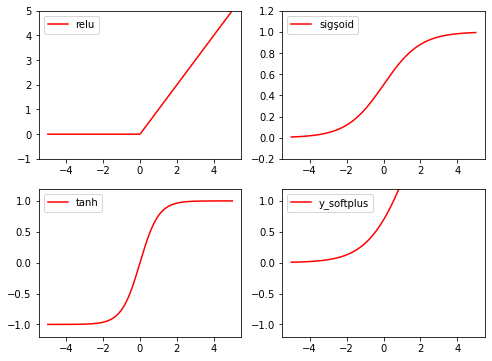

In [2]:
"""
author: PWG
date: 2022-03-29 12:18
"""
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib. pyplot as plt
# fake data
x = torch. linspace (-5, 5, 200) # x data (tensor), shape=(100, 1)
x=Variable(x)
x_np = x.data.numpy()
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid (x).data.numpy()
y_tanh = torch.tanh (x). data. numpy ()
y_softplus = F.softplus (x). data. numpy()
plt.figure(1, figsize=(8, 6))
plt.subplot (221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')
plt.subplot (222)
plt.plot(x_np, y_sigmoid, c='red', label='sigşoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')
plt.subplot (223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')
plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='y_softplus')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')
